In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numpy import genfromtxt
data1 = genfromtxt('data1.csv', delimiter=',')
X = data1[:,:-1]
y = data1[:, -1]


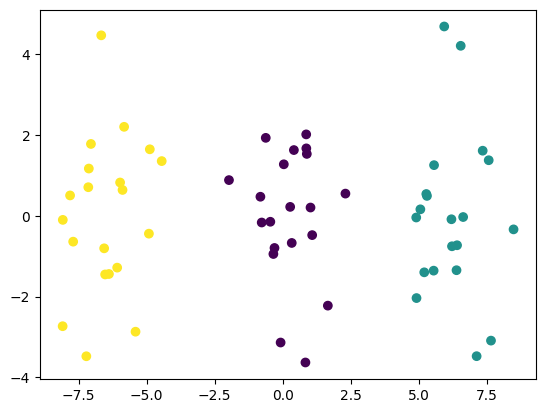

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_copy = X.copy()
X_copy = pca.transform(X_copy)
plt.scatter(X_copy[:,0], X_copy[:,1], c=y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


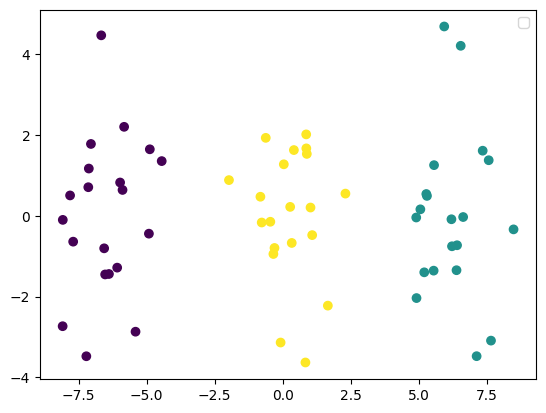

In [13]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=3)
kmc.fit(X)
kmc.labels_
plt.scatter(X_copy[:,0], X_copy[:,1], c=kmc.labels_)

#### The clusters did well when K=3 which is equal to number of classes we actually have

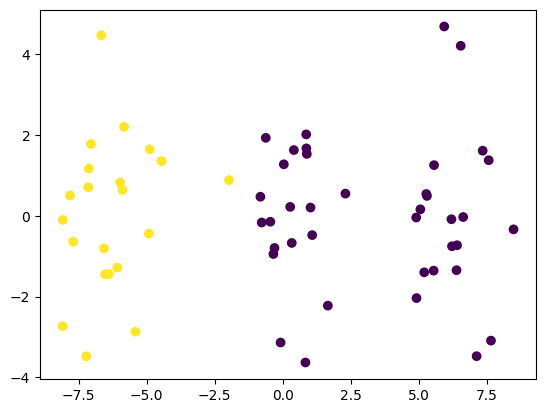

In [16]:
kmc = KMeans(n_clusters=2)
kmc.fit(X)
kmc.labels_
plt.scatter(X_copy[:,0], X_copy[:,1], c=kmc.labels_)

#### Here K=2 underfit the data so 2 classes were combined into one

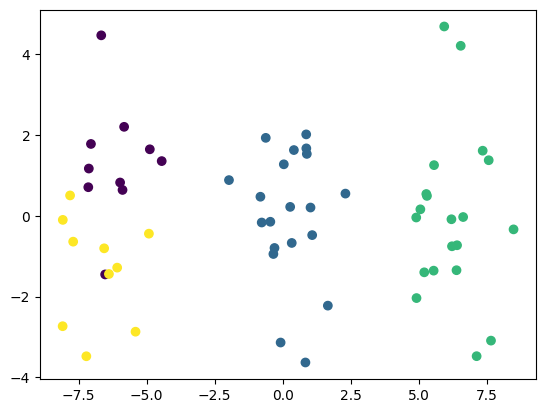

In [17]:
kmc = KMeans(n_clusters=4)
kmc.fit(X)
kmc.labels_
plt.scatter(X_copy[:,0], X_copy[:,1], c=kmc.labels_)

#### Here K=4 overanalyzed the data in the sense that it forceably tried to find a non-existent class

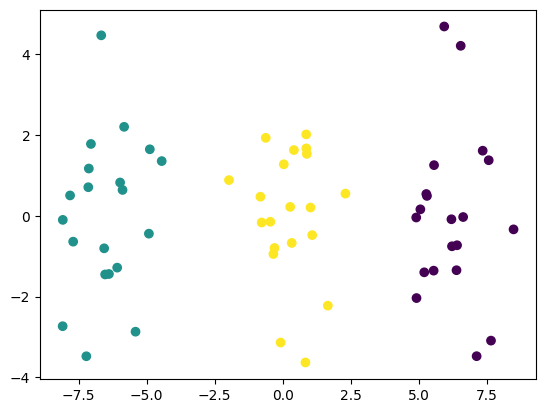

In [18]:
kmc = KMeans(n_clusters=3)
kmc.fit(X_copy)
kmc.labels_
plt.scatter(X_copy[:,0], X_copy[:,1], c=kmc.labels_)

#### It performed equally well at a lower computational cost, we might also add that there was no detrimental loss of information picking only 2 PCs
#### they almost covered all the necessary variance to perform good clsutering/modelling.

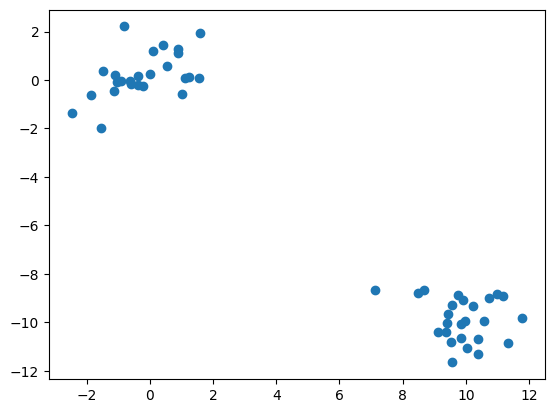

In [15]:
data2 = np.genfromtxt('data2.csv', delimiter=',')
plt.scatter(data2[:,0], data2[:,1])

In [20]:
data2.shape

(50, 2)

#### We see two clusters of data

In [21]:
# Inter Observational Distance
from scipy.spatial.distance import pdist, squareform
squareform(pdist(data2, metric='euclidean'))

array([[ 0.        ,  2.08214614,  1.10195725, ..., 14.34321683,
        13.10424821, 14.67207989],
       [ 2.08214614,  0.        ,  2.381689  , ..., 14.02567746,
        12.62468049, 14.13172651],
       [ 1.10195725,  2.381689  ,  0.        , ..., 15.42505849,
        14.16549841, 15.72666554],
       ...,
       [14.34321683, 14.02567746, 15.42505849, ...,  0.        ,
         1.70270849,  1.57807901],
       [13.10424821, 12.62468049, 14.16549841, ...,  1.70270849,
         0.        ,  1.59521567],
       [14.67207989, 14.13172651, 15.72666554, ...,  1.57807901,
         1.59521567,  0.        ]])

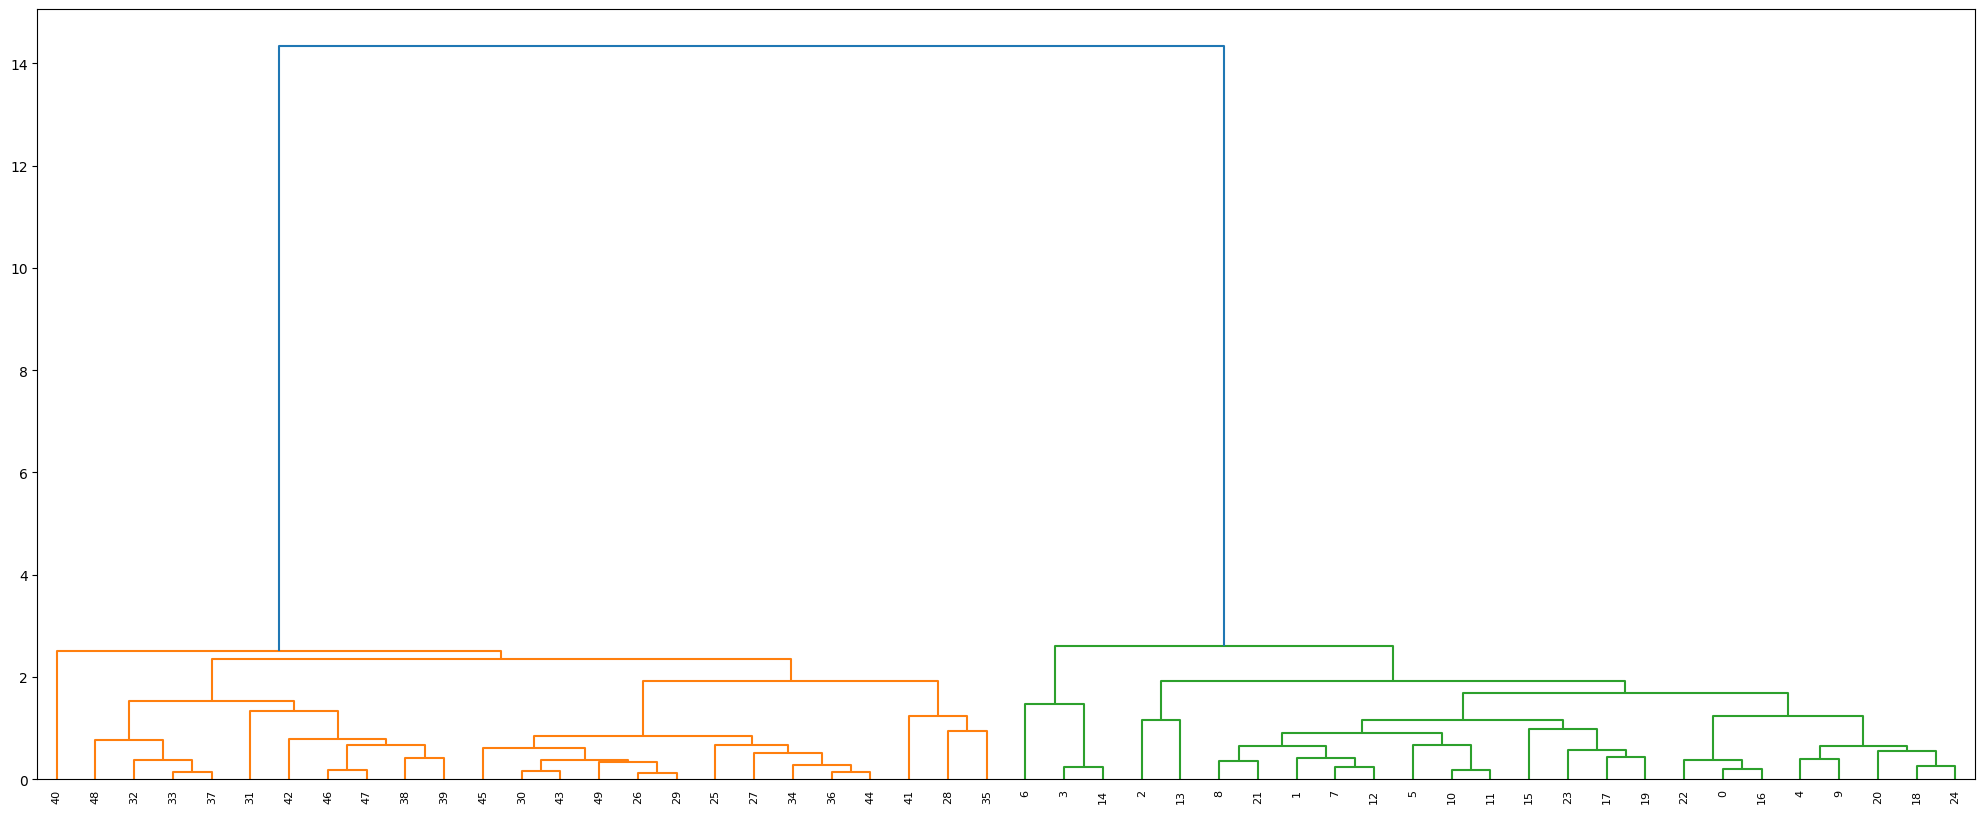

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data2, 'average')
figure = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

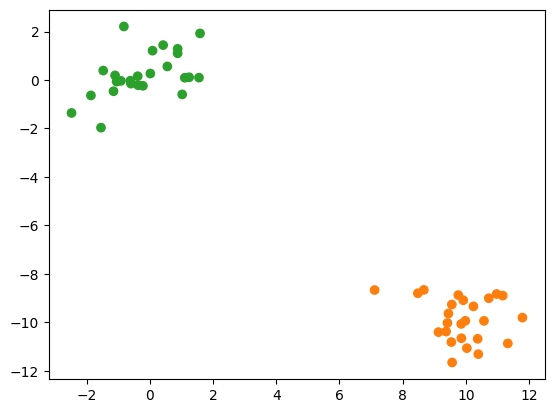

In [35]:
plt.scatter(data2[:,0], data2[:,1], c=dn['leaves_color_list'])

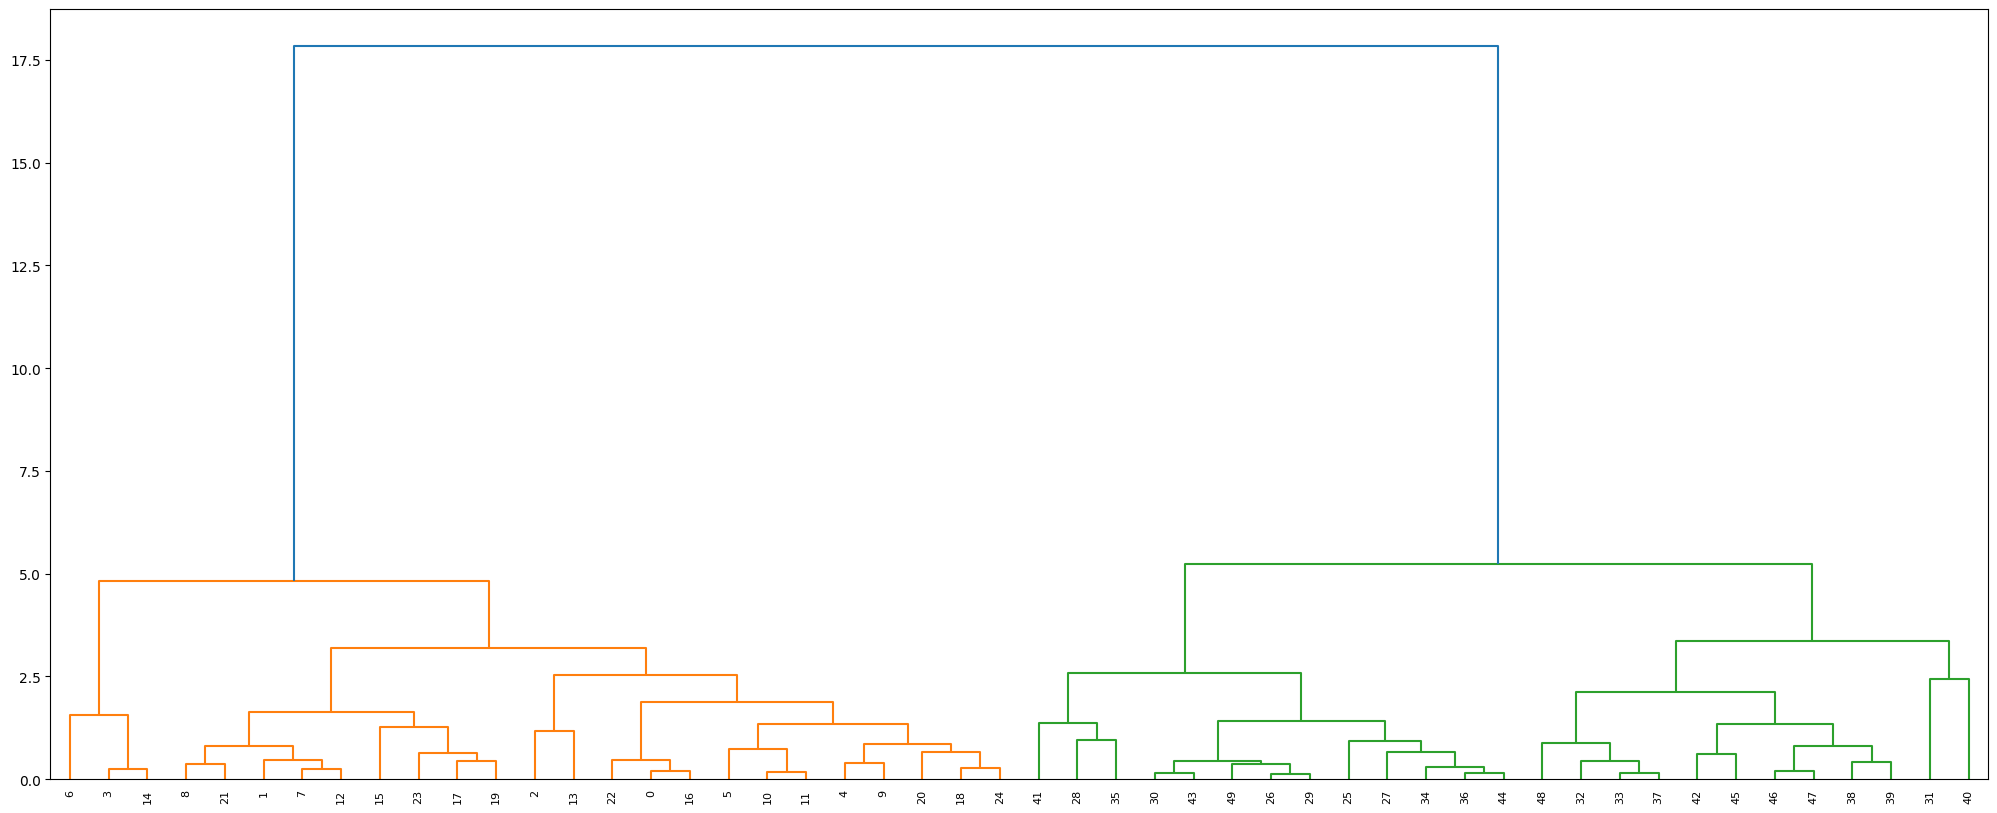

In [36]:
Z = linkage(data2, 'complete')
figure = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
dn["leaves_color_list"]
plt.show()

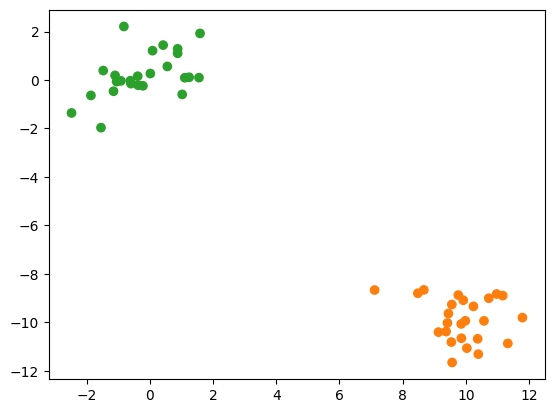

In [37]:
plt.scatter(data2[:,0], data2[:,1], c=dn['leaves_color_list'])

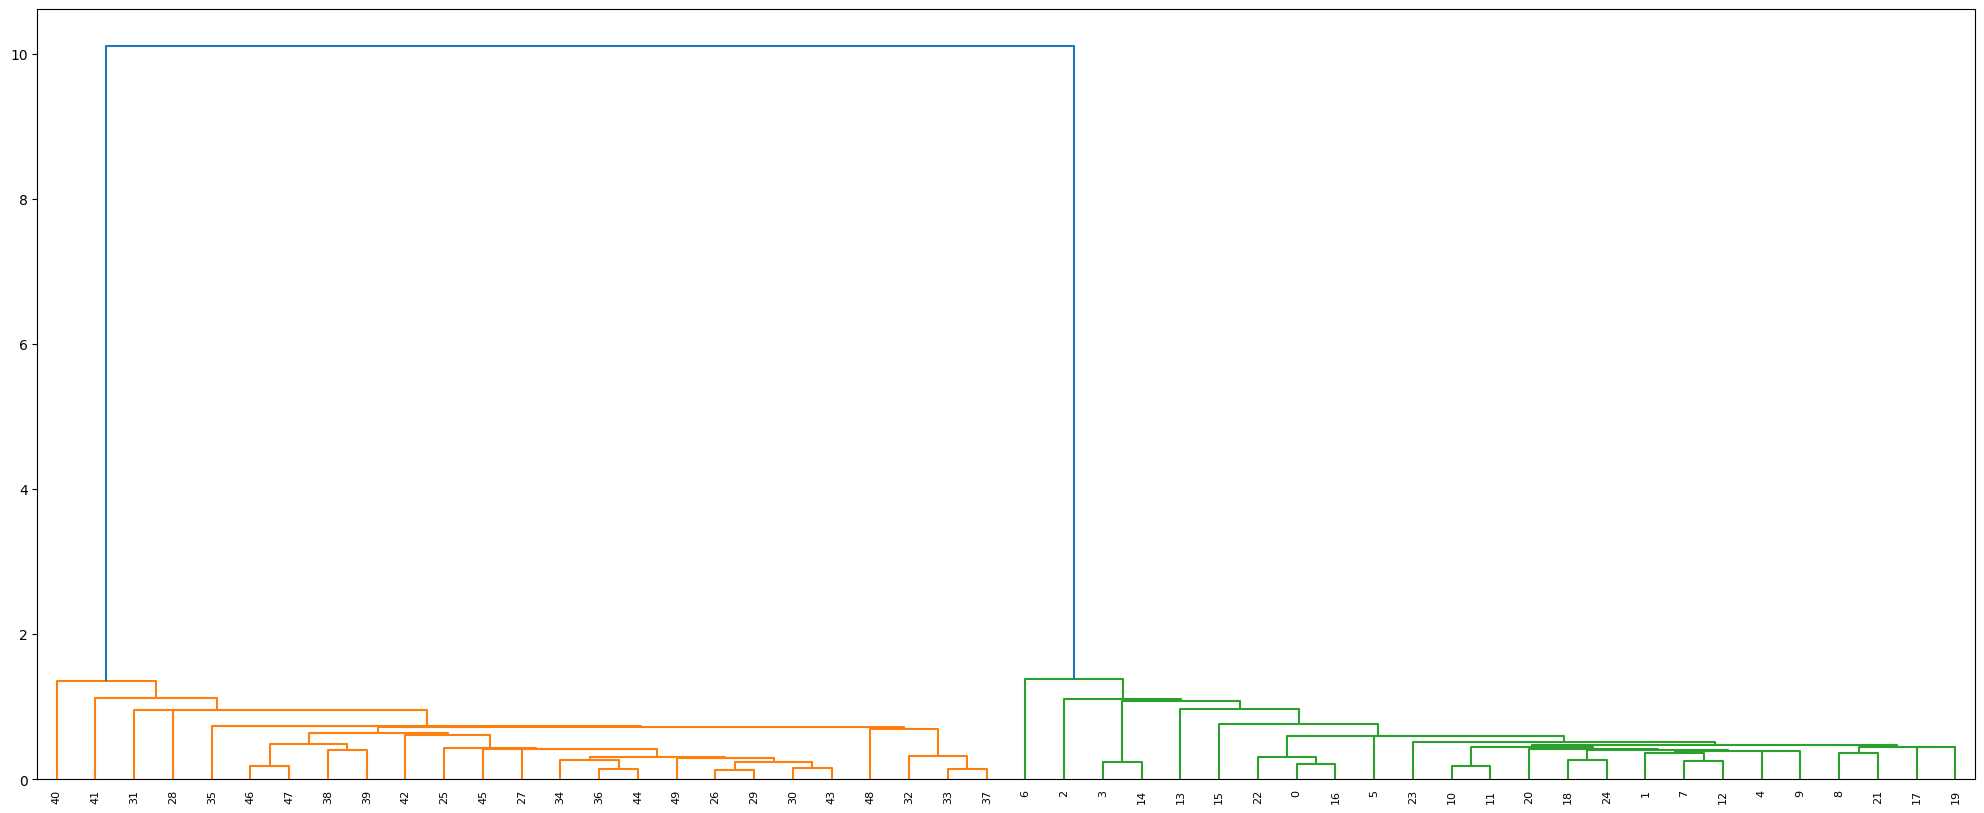

In [38]:
Z = linkage(data2, 'single')
figure = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
dn["leaves_color_list"]
plt.show()

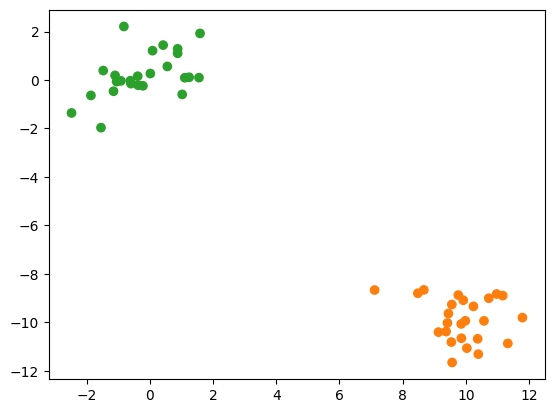

In [39]:
plt.scatter(data2[:,0], data2[:,1], c=dn['leaves_color_list'])